# Homework Assignment 6

### Due: February 19th, 2021, 11:59pm (Pacific Time).

### Instructions: 

This HW is an experimental Jupyter notebook format. Please let us know if you like it or prefer the other way!

### Problem 1 : 
Your math can be handwritten. In that case take a photo, put jpg image in the same directory as this notebook and put `![Alt text description](/path/to/file.jpg) ` in a Markdown cell under the question cell.  If you have questions about Markdown syntax just use your search engine for a cheat sheet. 

Alternatively, your math may be done directly in LaTeX commands within the Markdown cell. Just type something like `$\frac{1}{2} {\lVert \mathbf{w} \rVert_2}^2$` for $\frac{1}{2} {\lVert \mathbf{w} \rVert_2}^2$.  Also syntax like `$$ ... math stuff .. $$` produces an equation on its own line instead of wedged into the current text like the single \$ version does.

### Problems 2-8:
Output from Jupyter Notebook code.  *Make sure you don't write long lines of code that don't linewrap*. We need to be able to see your code when it gets turned into PDF below.

### Submission:
Generate a PDF by using `File->Print->Preview` or `File->Download as->PDF via LaTeX`. Please make sure and keep your ipynb file... we may ask you to submit it if we have questions about your code.

### Late Policy:
Late assignments are deducted 5\% each day they are late. No late assignments are accepted after one week. 

### System Setup: 
For this class, please use \textbf{Python 3.6} or later for homework with recent copies of the libraries NumPy, SciPy, Pandas, Scikit-learn, Matplotlib, Seaborn, and Jupyter-Notebook. 

To run a Jupyter Notebook you may use [UCSD Datahub](https://datahub.ucsd.edu) or [Google Colab](https://colab.google.com) or your own local installation.  If you decide on local installation, and you are creating your own setup for the first time we highly recommend you use [Anaconda](https://anaconda.com) as it will come with all the required libraries and more.  

If you are not feeling comfortable with the programming assignments in this homework, it might help to take a look at https://github.com/UCSD-COGS108/Tutorials



# 1. Logistic Regression

Assume in a binary classification problem, we need to predict a binary label $y\in \{-1,+1\}$ for a feature vector $\mathbf{x}=[x_0,x_1]^\top$. In logistic regression, we can reformulate the binary classification problem in a probabilistic framework: We aim to model the distribution of classes given the input feature vector $\mathbf{x}$. Specifically, we can express the conditional probability $p(y|\mathbf{x})$ parameterized by $(\mathbf w, b)$ using a logistic function. Assume the probability of the positive prediction $p(y=+1|\mathbf{x})$ is represented as:
\begin{align}
p(y=+1|\mathbf{x})=\displaystyle\frac{1}{1+e^{-(\mathbf w^T \mathbf{x} + b)}}
\end{align}


## 1.1 (10 points) Basic Formulation



### 1.1.1 
Please derive the formulation of $p(y=-1|\mathbf{x})$.

$$p(y = -1|\mathbf{x}) = 1 - p(y = +1|\mathbf{x})$$
$$1 - \frac{1}{1 + e^{-(\mathbf w^T \mathbf{x} + b)}}$$
$$\frac{1 + e^{-(\mathbf w^T \mathbf{x} + b)}}{1 + e^{-(\mathbf w^T \mathbf{x} + b)}} - \frac{1}{1 + e^{-(\mathbf w^T \mathbf{x} + b)}}$$
$$\frac{e^{-(\mathbf w^T \mathbf{x} + b)}}{1 + e^{-(\mathbf w^T \mathbf{x} + b)}} (\frac{e^{\mathbf w^T \mathbf{x} + b}}{e^{\mathbf w^T \mathbf{x} + b}})$$
$$\frac{1}{1 + e^{\mathbf w^T \mathbf{x} + b}}$$

### 1.1.2 
Please show that  $p(y|\mathbf{x})=\displaystyle\frac{1}{1+e^{-y (\mathbf w^T \mathbf{x} + b)}}$. 

$$y = +1$$
$$p(y|\mathbf{x}) = p(+1|\mathbf{x}) = \frac{1}{1+e^{-y (\mathbf w^T \mathbf{x} + b)}} = \frac{1}{1+e^{-(+1)(\mathbf w^T \mathbf{x} + b)}} = \frac{1}{1+e^{-(\mathbf w^T \mathbf{x} + b)}} = p(y = +1|\mathbf{x})$$

$$y = -1$$
$$p(y|\mathbf{x}) = p(-1|\mathbf{x}) = \frac{1}{1+e^{-y (\mathbf w^T \mathbf{x} + b)}} = \frac{1}{1+e^{-(-1)(\mathbf w^T \mathbf{x} + b)}} = \frac{1}{1+e^{(\mathbf w^T \mathbf{x} + b)}} = p(y = -1|\mathbf{x})$$

## 1.2 (17 points) Derive Gradient

Given a training dataset $S_\text{training} = \{(\mathbf{x}_i, y_i)\}, i=1,\ldots,n\}$, we wish to optimize the negative log-likelihood loss $\mathcal{L}(\mathbf w, b)$ of the logistic regression model defined above:
\begin{equation}
\mathcal{L}(\mathbf w, b)=-\sum_{i=1}^{n} \ln p_i 
\end{equation}

where $p_i = p(y_i|\mathbf{x}_i)$. The optimal weight vector $\mathbf{w}$ and bias $b$ are used to build the logistic regression model:
\begin{equation}
\mathbf{w}^*, b^* = \arg\min_{\mathbf{w}, b}\mathcal{L}(\mathbf{w}, b)
\end{equation}
In this problem, we attempt to obtain the optimal parameters $\mathbf{w}^*$ and $b^*$ by using a standard gradient descent algorithm. 

### 1.2.1 
Please show that $\displaystyle\frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial \mathbf{w}} = -\sum_{i=1}^n (1-p_{i}) y_i\mathbf{x}_i$.

$$\mathcal{L}(\mathbf{w},b) = -\sum_{i=1}^{n} \ln p_i = \sum_{i=1}^{n} \ln (\frac{1}{p_i}) =$$
$$\sum_{i=1}^{n} \ln (1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)})$$
$$\frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial \mathbf{w}} = \frac{\partial}{\partial \mathbf{w}} \sum_{i=1}^{n} \ln (1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}) = \sum_{i=1}^{n} \frac{\partial}{\partial \mathbf{w}} \ln (1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}) = $$
$$\sum_{i=1}^{n} \frac{1}{1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}} \frac{\partial}{\partial \mathbf{w}} (1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}) = $$
$$\sum_{i=1}^{n} \frac{1}{1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}} (e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)})\frac{\partial}{\partial \mathbf{w}}(-y_i(\mathbf{w}^T \mathbf{x}_i + b)) = $$
$$\sum_{i=1}^{n} \frac{1}{1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}} (e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)})(-y_i \mathbf{x}_i)) = \sum_{i=1}^{n} \frac{e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}}{1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}}(-y_i \mathbf{x}_i)) = $$
$$\sum_{i=1}^{n} \frac{e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)} + 1 - 1}{1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}}(-y_i \mathbf{x}_i)) = \sum_{i=1}^{n}(\frac{e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)} + 1}{1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}} - \frac{1}{1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}})(-y_i \mathbf{x}_i)) = $$
$$\sum_{i=1}^{n}(1 - p_i)(-y_i \mathbf{x}_i)) = -\sum_{i=1}^{n}(1 - p_i)(y_i \mathbf{x}_i))$$

### 1.2.2

Please show that $\displaystyle\frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial b} = -\sum_{i=1}^n (1-p_{i}) y_i$.

$$\frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial b} = \frac{\partial}{\partial b} \sum_{i=1}^{n} \ln (1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}) = $$
$$\sum_{i=1}^{n} \frac{e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}}{1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}} (-y_i) = \sum_{i=1}^{n} \frac{1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)} - 1}{1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}} (-y_i) = $$
$$\sum_{i=1}^{n} (1 - \frac{1}{1 + e^{-y_i(\mathbf{w}^T \mathbf{x}_i + b)}}) (-y_i) = \sum_{i=1}^{n} (1 - p_i) (-y_i) = -\sum_{i=1}^{n} (1 - p_i) (y_i)$$

## Background for Problems 2 - 7

We've already discussed the basic formulation of logistic regression in Problem 1. 

We've seen that it optimizes the log loss  on a training datase using gradient descent. In the example below log loss is augmented by an $L_2$ regularization term, but it could be an $L_1$, an elasticnet mixture of the two, or no regularization at all.
\begin{equation}
\mathcal{L}(\mathbf w, b)= -C \sum_{i=1}^{n} \ln p(y_i|\mathbf{x}_i) + \frac{1}{2} {\lVert \mathbf{w} \rVert_2}^2
\end{equation}


\begin{equation}
\mathbf{w}^*, b^* = \arg\min_{\mathbf{w}, b}\mathcal{L}(\mathbf{w}, b)
\end{equation}

\begin{align}
\frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial \mathbf{w}} = -C \sum_{i=1}^n (1-p_{i}) y_i\mathbf{x}_i + \mathbf{w}, \quad\quad
\frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial b} = -C \sum_{i=1}^n (1-p_{i}) y_i.
\end{align}

The log loss function is convex. The regularization term is also convex. The sum of two convex functions is also convex. Therefore gradient descent should be able to find the global optimum.

Once the gradient descent has converged, that is the delta is vanishingly small (under a tolerance threshold), then it has arrived at a flat (within tolerance) spot which must be the global minimum.  An implementation like in scikit-learn will continue gradient descent until it reaches convergence or until reaches a maximum number of iterations. The iterations limit prevents it from spending forever trying to solve an unsolvable problem like when classes are not linearly seperable.  There are many differen numeric solver algorithms that can do this task, each with their own pros and cons. 

We will explore all this below.

## Scikit-learn logistic regression

Let's use sklearn's LogisticRegression class on some not quite seperable binary classes

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set_style('white')

from sklearn.datasets import load_digits, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler 
from sklearn.preprocessing import RobustScaler, Normalizer, QuantileTransformer, PowerTransformer

C:\Users\duyph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


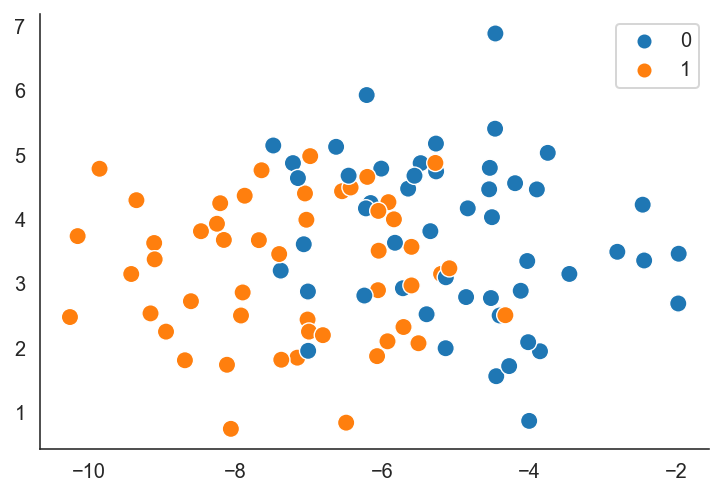

In [2]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=1972, cluster_std=1.2)
sns.scatterplot(X[:, 0], X[:, 1], hue=y, s=75)
sns.despine()
xl = plt.xlim()
yl = plt.ylim()

In [3]:
def plot_decision_probability(model, xlim=(-5,5), ylim=(-5,5)):
    ax = plt.gca()
    cm = plt.cm.RdBu_r
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    Z = model.predict_proba(xy)[:, 1].reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P, colors='k', levels=[0])
    
    # plot probabilities
    CS = ax.contourf(X, Y, Z, cmap=cm, alpha=.8)
    fig = plt.gcf();
    cbar = fig.colorbar(CS)
    cbar.ax.set_title('logit probability')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


Here is [scikit-learn's documentation on LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

## 2. Basic use of LogisticRegression()

Enter your code at the prompts below corresponding to the problem numbers here.

### 2.1  (5 points)
Use the docs above to create a classifier with no regularization. 

### 2.2  (5 points)
Get the accuracy of the classifier on the training data

C:\Users\duyph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Training set accuracy 0.79


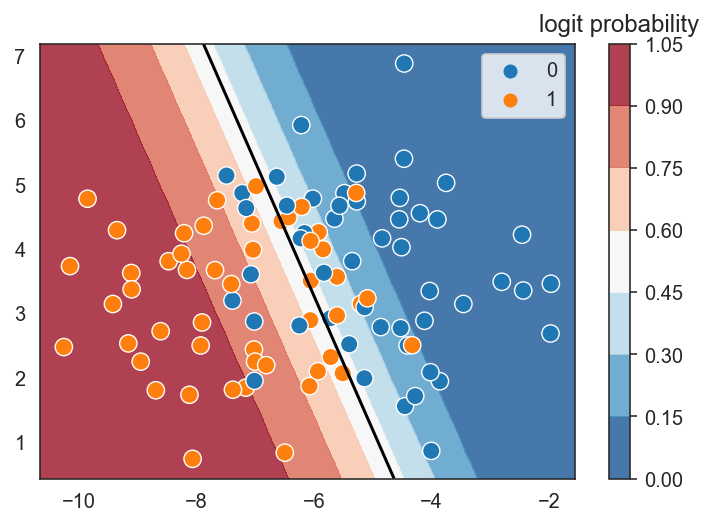

In [4]:
#### (2.1) YOUR CODE GOES HERE #####
model = LogisticRegression(penalty='none')

model.fit(X,y)

#### (2.2) YOUR CODE GOES HERE #####
acc = accuracy_score(y, model.predict(X))

plot_decision_probability(model, xlim=xl, ylim=yl)
sns.scatterplot(X[:, 0], X[:, 1], hue=y, s=75);

print(f'Training set accuracy {acc}')

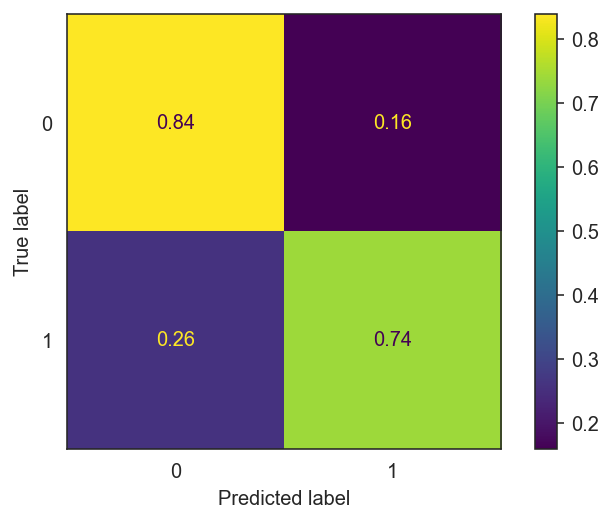

In [5]:
plot_confusion_matrix(model,X,y,normalize='true');

Now do it again below for the regularized version.

## 3. Use L2 regularization with LogisticRegression()
Enter your code at the prompts below corresponding to the problem numbers here. Again you may find [scikit-learn's documentation on LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) helpful



### 3.1 (5 points)

Create a classifier with $L2$ regularization with C=0.001 

### 3.2 (2 points)

Get the accuracy of the classifier on the training data as you did in 2.2

C:\Users\duyph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Training set accuracy 0.77


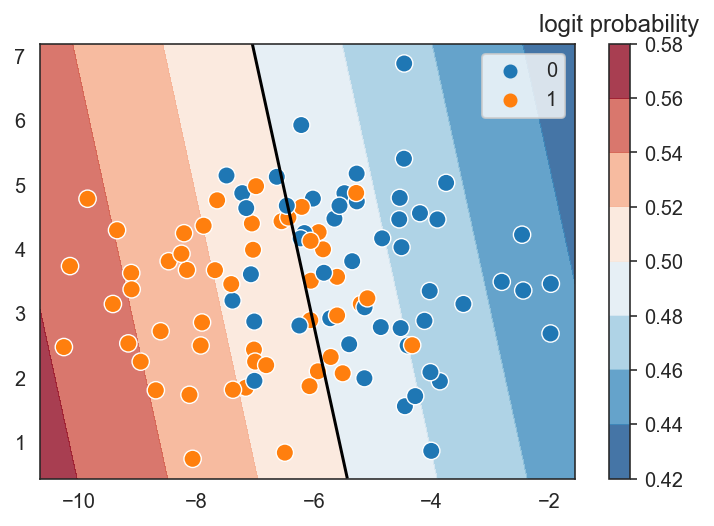

In [6]:
#### (3.1) YOUR CODE GOES HERE #####
model_l2 = LogisticRegression(penalty='l2', C=0.001)

model_l2.fit(X,y)

#### (3.2) YOUR CODE GOES HERE #####
acc = accuracy_score(y, model_l2.predict(X))

plot_decision_probability(model_l2, xlim=xl, ylim=yl)
sns.scatterplot(X[:, 0], X[:, 1], hue=y, s=75);

print(f'Training set accuracy {acc}')


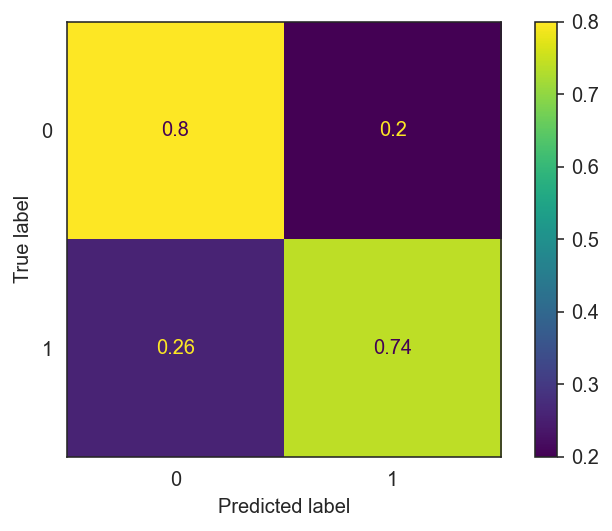

In [7]:
plot_confusion_matrix(model_l2,X,y,normalize='true');

## 4. (10 points) Describe the difference in the no regularization vs the regularized classification


### The regularized classification also has a lower accuracy on the training set. The regularized classifier also assigns a less extreme probability near the decision boundary, meaning that the model is less certain about the class of a data point the closer it is to the boundary. 

Now let's try to do some cross-validation to find the best possible value of C to solve a much more complex problem.

The digits dataset is 1797 examples of handwritten digits 0-9, digitized into tiny 8x8 (64) pixel images.  We are going to turn this into a binary classification problem by putting digits 0-4 as the positive class and digits 5-9 as the negative class

In [8]:
digits = load_digits()

X, y = digits.data, digits.target

# classify small against large digits
y = (y > 4).astype(np.int)

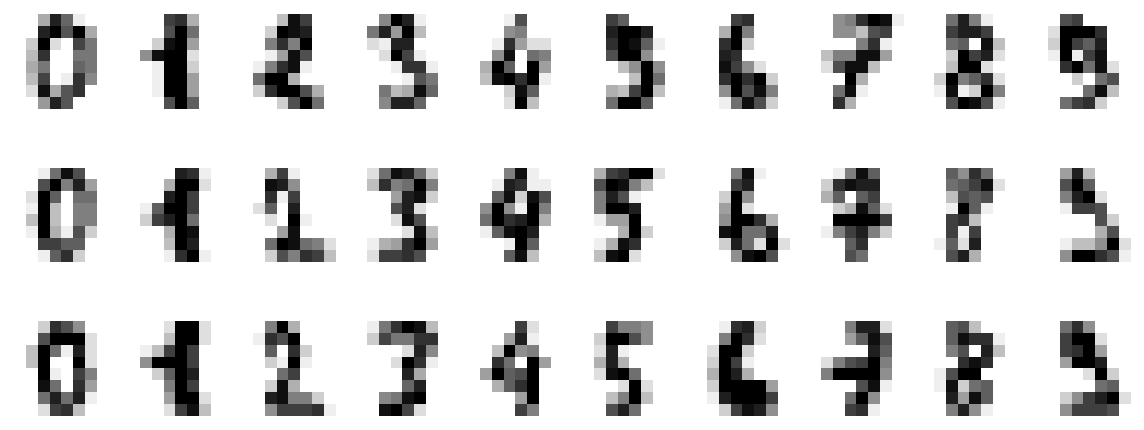

In [9]:
# heres some examples of these super low resolution handwritten digits
fig, axs = plt.subplots(3, 10, figsize=(10,4))
for n, ax in enumerate(axs.flatten()):
    ax.imshow(X[n,:].reshape(8,8), cmap='gray_r')
    ax.axis('off')
    


To encode each image we just turn the 8x8 image into a single 64 long vector. That is we pretend that each pixel is just an independent variable from which we are trying to  

Below we are going to try out several difference values of C (inside the list `Cvals`).  For each C, we will do 5 fold cross-validation, and see what the mean validation accuracy is across all 5 folds.  The C value with the highest accuracy is our best choice. 

## 5. Validation curve

Enter your code at the prompts below corresponding to the problem numbers here.



### 5.1 (5 points)
Instantiate the correct logistic regression setup for each C value we test. Note that you may have to adjust the solver's parameters if you encounter a `Convergence Warning`. This means that the numercial solver perfroming gradient descent did not reach a flat enough (delta < tolerance) area before reaching the maximum allowable number of gradient descent steps.  The answer you have is an answer, but it is not a good enough answer because gradient descent didn't finish! You will need to look at the sklearn docs to figure out how to fix this issue.

### 5.2 (5 points)
Use the kfold cross validation to create two lists: `train` and `holdhout` which have the indices of those elements of the `X` matrix that will be used for the training and holdout (validation) at each iteration (fold of the cross validator)

### 5.3 (5 points)
Make a plot showing C value on x-axis and cross-validation score on the y-axis. You will need to make the x-axis a log scale so we can see things properly. Some relevant docs are: [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) and the [pandas plotting tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

,C,accuracy
0,0.000001,0.809683
1,0.000010,0.822482
2,0.000100,0.851419
3,0.001000,0.879800
4,0.010000,0.875348
5,0.100000,0.873678
6,1.000000,0.870896
7,10.000000,0.868670
8,100.000000,0.869226
9,1000.000000,0.868670


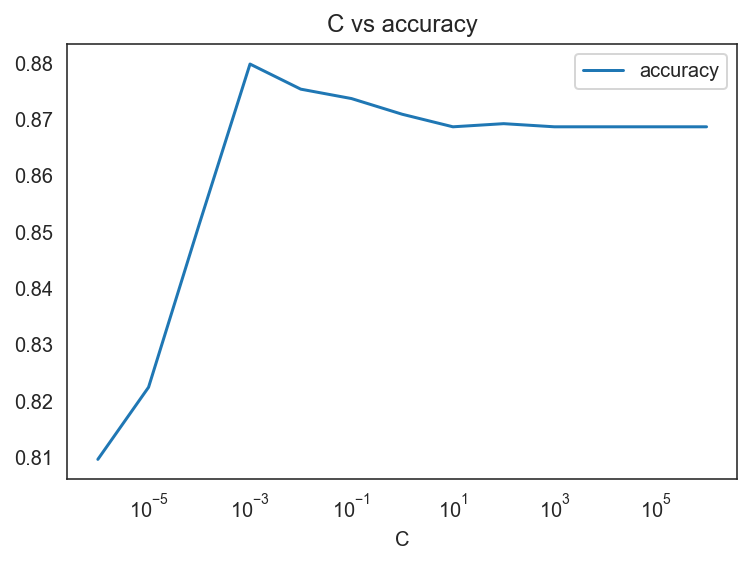

In [10]:
Cvals = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
k_fold = KFold(n_splits=5)

results_l2=[]
for C in Cvals:
    # instantiate a logistic regression with L2 penalty and the proper C value for this iteration of the loop
    #### (5.1) YOUR CODE GOES HERE #####
    model = LogisticRegression(penalty='l2', C=C, solver='liblinear')
    
    # collect the predicted y values and true y values of each hold out set
    predicteds=[]
    trueys=[]
    
    #### (5.2) YOUR CODE GOES HERE #####
    for train, holdout in k_fold.split(X, y):
        model.fit(X[train],y[train])
        predicteds.append( model.predict(X[holdout]) )
        trueys.append( y[holdout] )

    # this is because we ended up with a list of arrays, one entry per fold
    # we need a flat array of all the folds together
    predicteds = np.concatenate(predicteds)
    trueys = np.concatenate(trueys)
    
    results_l2.append( [C, accuracy_score(trueys,predicteds)] ) 

results_l2 = pd.DataFrame( results_l2, columns=['C', 'accuracy'])

#### (5.3) YOUR CODE GOES HERE #####
results_l2.plot(x='C', y='accuracy', kind='line', title='C vs accuracy', logx=True)

results_l2

## Oops
We have committed one of the fundamental errors of Machine Learning.  We applied a technique without really knowing if it was appropriate to our data. Generally in any ML or data analysis problem the first thing to do is to check out the data in as raw a form as you can. Then do some summary statistics to check out its properties.  Let's fix this problem below

Let's see what the raw pixel values are like... Hmmm looks like there are 16 levels of gray, and most measurements are 0. The rest of the gray values are pretty uniformly distributed, except for slightly more 15s. 

count    115008.000000
mean          4.884165
std           6.016814
min           0.000000
25%           0.000000
50%           1.000000
75%          10.000000
max          16.000000
dtype: float64

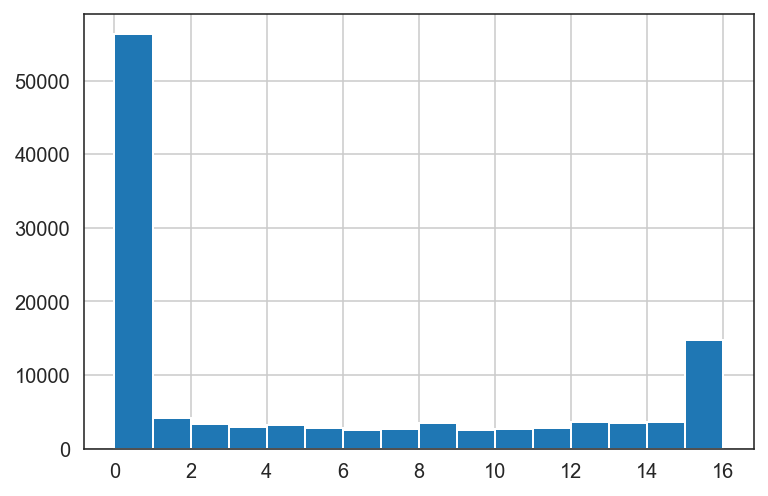

In [11]:
xvals = pd.Series( X.ravel()) # this are just all the pixel values in one lump 
xvals.hist(bins=16)
xvals.describe()

Looks like the mean values per pixel are mostly zeros, and a bit bimodal looking. Whatever the exact distribution, the important part is that there are definitely pixels with very different average brightnesses.  The difference range over a factor of 10x.  Which is maybe just big enough to be worried about in terms of the algorithm preferring class-predicting large magnitude pixels to similarly good at class-predicting small magnitude pixels.

count    64.000000
mean      4.884165
std       4.207763
min       0.000000
25%       0.297718
50%       4.464942
75%       8.747635
max      12.089037
dtype: float64

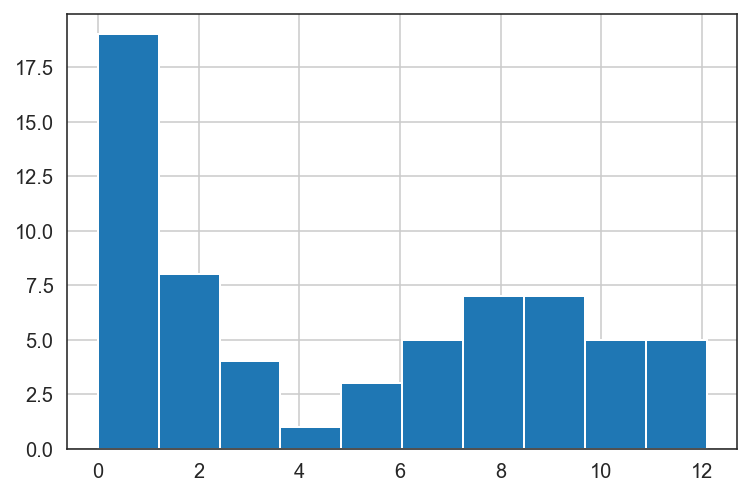

In [12]:
# hmm, lets see if the mean values for each pixel (vector element) are roughly the same
# maybe there are some pixels which tend to be darker on average than others?
xvals_per_pixel = pd.DataFrame(X)
xvals_per_pixel.mean().hist()
xvals_per_pixel.mean().describe()
# yep

We see very much the same pattern with standard deviation, but even moreso. There are pixels with brightness that is highly variable and pixels which are always about the same.  This also about an order of magnitude, and therefore maybe just big enough for us to worry about.

count    64.000000
mean      3.684032
std       2.300911
min       0.000000
25%       1.024137
50%       4.268115
75%       5.819658
max       6.537955
dtype: float64

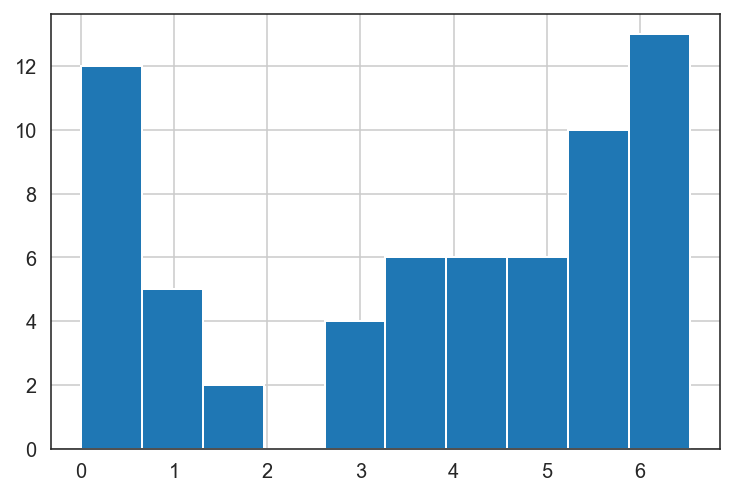

In [13]:
# hmm, lets see if the standard deviation of the values for each pixel (vector element) are roughly the same
# maybe there are some pixels which tend to be much more varied in their brightness on than others?
xvals_per_pixel.std().hist()
xvals_per_pixel.std().describe()
# yep

Now these differences are only a factor of 10 between different variables. But we do know that Logistic Regression is an algorithm that can tend to rely more on variables that have larger magnitude than smaller magnitude variables.  The results above indicate that we there probably isn't much to worry about, but we should at least see if rescaling the variables will change our results.

## 6. Use standard scaler with L2 regularization to generate a validation curve

Enter your code at the prompts below corresponding to the problem numbers here.
 

### 6.1 (5 points)
Transform the X variable using [sklearn.preprocessing.StandardScaler()](https://scikit-learn.org/stable/modules/preprocessing.html)

### 6.2 (2 points)
Reuse the LogisticRegression call from 5.1

### 6.3 (2 points)
Reuse the k-folds for loop from 5.2, but change X to Xsc!

### 6.4 (2 points)
Reuse the plot command from 5.3


,C,accuracy
0,0.000001,0.788536
1,0.000010,0.792432
2,0.000100,0.806344
3,0.001000,0.841402
4,0.010000,0.872009
5,0.100000,0.874791
6,1.000000,0.872009
7,10.000000,0.869783
8,100.000000,0.868670
9,1000.000000,0.868670


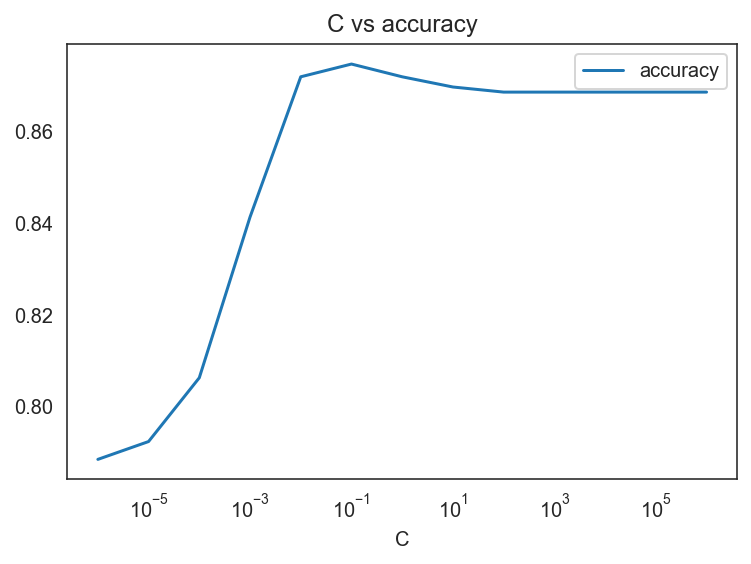

In [14]:
#### (6.1) YOUR CODE GOES HERE #####
Xsc = StandardScaler().fit(X).transform(X)

Cvals = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
k_fold = KFold(n_splits=5)

results_l2sc=[]
for C in Cvals:
    # instantiate a logistic regression with L2 penalty and the proper C value for this iteration of the loop
    #### (6.2) YOUR CODE GOES HERE #####
    model = LogisticRegression(penalty='l2', C=C, solver='liblinear')
    
    # collect the predicted y values and true y values of each hold out set
    predicteds=[]
    trueys=[]
    
    #### (6.3) YOUR CODE GOES HERE ##### Note you better change X to Xsc!!!
    for train, holdout in k_fold.split(Xsc, y):
        model.fit(Xsc[train],y[train])
        predicteds.append( model.predict(Xsc[holdout]) )
        trueys.append( y[holdout] )

    # this is because we ended up with a list of arrays, one entry per fold
    # we need a flat array of all the folds together
    predicteds = np.concatenate(predicteds)
    trueys = np.concatenate(trueys)
    
    results_l2sc.append( [C, accuracy_score(trueys,predicteds)] ) 

results_l2sc = pd.DataFrame( results_l2sc, columns=['C', 'accuracy'])

#### (6.4) YOUR CODE GOES HERE ##### 
results_l2sc.plot(x='C', y='accuracy', kind='line', title='C vs accuracy', logx=True)

results_l2sc

## 7. L1 normalization with standardized inputs

Let's try an L1 normalized LogisticRegression(), and for simplicity we will only consider the case where we use StandardScaler().

### 7.1 (5 points)
Instantiate the correct model with L1 penalty. Note that you will have to change the solver as the default does not allow L1. Again you may find [scikit-learn's documentation on LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) helpful. To help us make the results reproducible please add the argument `random_state=42` to your call as well  


### 7.2 (2 points)
Reuse the k-folds for loop from 5.2, but change X to Xsc!

### 7.3 (2 points)
Reuse the plot command from 5.3

,C,accuracy
0,0.000001,0.501391
1,0.000010,0.501391
2,0.000100,0.501391
3,0.001000,0.501391
4,0.010000,0.834725
5,0.100000,0.877017
6,1.000000,0.875904
7,10.000000,0.870339
8,100.000000,0.868670
9,1000.000000,0.867001


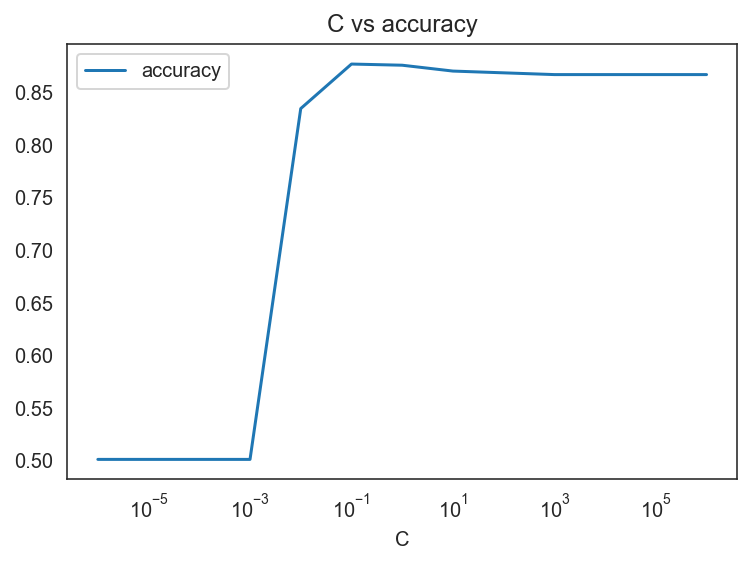

In [15]:
Cvals = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
k_fold = KFold(n_splits=5)

results_l1sc=[]
for C in Cvals:
    # instantiate a logistic regression with L1 penalty and the proper C value for this iteration of the loop
    #### (7.1) YOUR CODE GOES HERE #####
    model = LogisticRegression(penalty='l1', C=C, random_state=42, solver='liblinear')
    
    # collect the predicted y values and true y values of each hold out set
    predicteds=[]
    trueys=[]
    
    #### (7.2) YOUR CODE GOES HERE ##### 
    for train, holdout in k_fold.split(Xsc, y):
        model.fit(Xsc[train],y[train])
        predicteds.append( model.predict(Xsc[holdout]) )
        trueys.append( y[holdout] )

    # this is because we ended up with a list of arrays, one entry per fold
    # we need a flat array of all the folds together
    predicteds = np.concatenate(predicteds)
    trueys = np.concatenate(trueys)
    
    results_l1sc.append( [C, accuracy_score(trueys,predicteds)] ) 

results_l1sc = pd.DataFrame( results_l1sc, columns=['C', 'accuracy'])

#### (7.3) YOUR CODE GOES HERE ##### 
results_l1sc.plot(x='C', y='accuracy', kind='line', title='C vs accuracy', logx=True)

results_l1sc

OK lets put all 3 models validation curves together and take a look at how the different model/feature setups we've tried have changed what happened 

,C,max accuracy
model,,
"L1,scaled",0.100,0.877017
"L2,raw",0.001,0.879800
"L2,scaled",0.100,0.874791


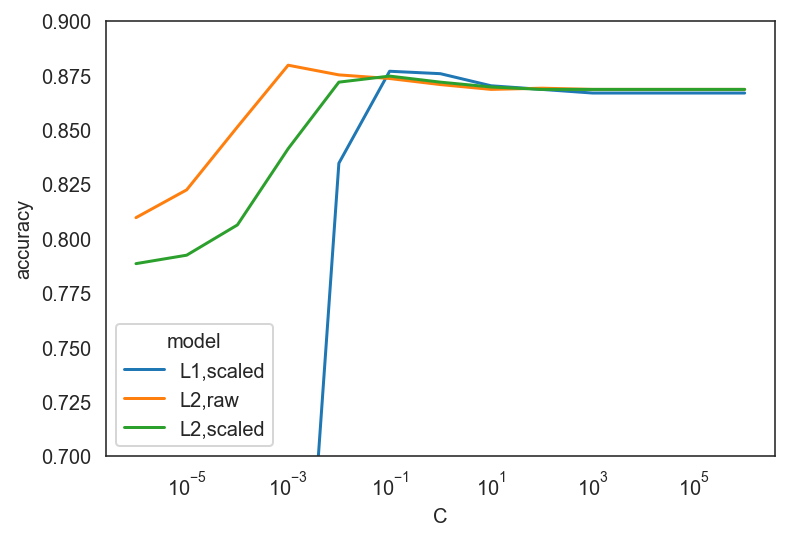

In [16]:
results_l1sc['model']='L1,scaled'
results_l2['model']='L2,raw'
results_l2sc['model']='L2,scaled'
results_all=pd.concat([results_l1sc,results_l2,results_l2sc])

sns.lineplot(data=results_all, x='C', y='accuracy', hue='model')
plt.ylim(0.7,0.9)
plt.xscale('log')

results_all.groupby('model').apply( lambda x: 
                                   x.sort_values(by='accuracy',ascending=False)
                                   .iloc[0]
                                   .drop('model')
                                   .rename({'accuracy':'max accuracy'})
                                  ) 

## 8. (10 points) Compare the different model forms you've tried
Write a short paragraph about the difference in validation curves between unscaled L2, scaled L2, and scaled L1 

### In all models, accuracy in the validation set increased with increasing C value up to a point. After this peak, accuracy drops with increasing C value. The shapes of both L2 models look similar, but the L1 model has a steeper slope before its peak. The C value for the peak accuracy is lowest in L2, raw but higher in L1, scaled and L2, scaled. The peak accuracy of all three models occurred in L2, raw with an accuracy of 0.8798. With high C values, all three models level off at an accuracy of around 0.87. 

## Closing note

We only tried the StandardScaler() but it is worth your time to [investigate all the different scaling options available in sklearn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)